<a href="https://colab.research.google.com/github/hsargoli/Mythesis-detect-type-of-DullDrillingBit/blob/master/wrong_work(thesis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd

'/content/drive/My Drive/path/Z/dataset'

In [ ]:
#!pip install mrcnn==0.1
!pip install mrcnn
!pip install tensorflow==1.4.1
#!pip install tensorflow==1.3
#!pip install keras==2.0.8
#!pip install keras==2.1.3
!pip install keras==2.1.5

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54932 sha256=b984a4295950b3b3c227c4f0958cff49192dd3f86a99e92687c4239f919dcd56
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn
     |████████████████████████████████| 41.2MB 102kB/s 
     |████████████████████████████████| 1.7MB 43.6MB/s 
     |████████████████████████████████| 890kB 44.5MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=45e1f8159ba89d15a9dd97546e74c0f5e29732f8c1727747c95435a4dfc1d79d
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
    

     |████████████████████████████████| 337kB 2.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!rm /usr/local/lib/python3.6/dist-packages/mrcnn/model.py

# `mask rcnn`

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarn

keras version 2.1.5
tf version  1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


gray shape: (67, 256, 256) 
circle.shape (67, 256, 256, 3)
target.shape (67, 80, 80, 2)


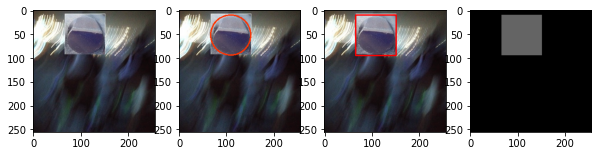

x min |, y min |, x max |, y max ||, and center
: [ 66.534  10.236 151.534  95.236] ||   center : [108  52]


In [ ]:
from mrcnn.config import Config
import keras
import tensorflow as tf
print('keras version',keras.__version__)
print('tf version ',tf.__version__)
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline
from os import listdir
from xml.etree import ElementTree


import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import seaborn as sns
import keras.layers as layers
import keras.models as models
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
import matplotlib.image as mplib
import datetime
import os 
sh=plt.imshow
import keras
os.chdir('/content/drive/My Drive/')
from pathlib import Path
import keras
from keras.utils import plot_model

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

# =========================================================
#  READ DATA 
# =========================================================
#set path
path=glob.glob('path/Z/dataset/images/*.jpg')
pathh=[]
for i in path:
  pathh.append(i)
pathh.sort()
pathh=selection_sort(pathh)
#imread
img_list=[]
for i in pathh:  
    a=cv2.imread(i)
    #a=np.sort(a)
    img_list.append(a)
#make datas
img_list2=img_list.copy()
img_nd=np.array(img_list)
img_nd2=np.array(img_list2)
img_gray=img_nd[:,:,:,1]
# =========================================================
#  READ coordinate of objects
# =========================================================
file=np.loadtxt('path/x.txt')
target=[]
for i in file:
    target.append(i[1:5])
start=np.array(target)

start=start[...,:2]
#end=start+100
#center=start+50
#SE=np.concatenate((start,end),axis=1)
#center=center.astype('int32')

start256=start * 0.853
end256=85+start256
center256=start256+42
SE256=np.concatenate((start256,end256),axis=1)
center256=center256.astype('int32')

# =========================================================
#  draw circle around targets
# =========================================================
#circle=[]
#x=cv2.circle(img_nd[1],(center[1,0],center[1,1]),radius=50,color=(100,0,0))
#for i in np.arange(0,len(center)):
#    a=cv2.circle(img_nd2[i],(center[i,0],center[i,1]),radius=50,color=(255,50,200),thickness=2)
#    circle.append(a)
#circle=np.array(circle)
#---------
circle256=[]
x=cv2.circle(img_nd[1],(center256[1,0],center256[1,1]),radius=50,color=(100,0,0))
for i in np.arange(0,len(center256)):
    a=cv2.circle(img_nd2[i],(center256[i,0],center256[i,1]),radius=42,color=(255,50,0),thickness=2)
    circle256.append(a)
circle256=np.array(circle256)
print('gray shape:',img_gray.shape,
     '\ncircle.shape',circle256.shape)
masks=np.zeros([67,256,256,3],dtype='int8')
len(masks)
img_mask=img_nd.copy()
img_box=np.array(img_list)
border_box=[]
for i in np.arange(0,len(center256)):
  xmin=int(SE256[i,0])
  ymin=int(SE256[i,1])
  xmax=int(SE256[i,2])
  ymax=int(SE256[i,3])
  a=cv2.rectangle(img_box[i],(xmin,ymin),(xmax,ymax),color=(255,0,0),thickness=2)
  border_box.append(a)

# =========================================================
#  make masks
# =========================================================
mask_target=[]
for i in np.arange(0,len(masks)):
    a=img_nd[i][int(SE256[i,1]):int(SE256[i,3]),int(SE256[i,0]):int(SE256[i,2])]
    mask_target.append(a)
mask_target=np.array(mask_target)
# =========================================================
#  make target layers      ||  wrong work ||
# =========================================================
imm=img_list.copy()
imm=np.array(imm)
imm=imm[:,:,:,0:2]    
ime=[]
for i in np.arange(0,len(imm)):
    a=cv2.resize(imm[i],(80,80))
    ime.append(a)
ime=np.array(ime)
print('target.shape',ime.shape)
doo=ime.copy()
SE80=SE256*.26666666
py1=[]
py2=[]
px1=[]
px2=[]
for i in np.arange(0,len(SE80)):
    y1=SE80[i,1]
    y2=SE80[i,3]
    x1=SE80[i,0]
    x2=SE80[i,2]
    py1.append(y1)
    py2.append(y2)
    px1.append(x1)
    px2.append(x2)
for i in np.arange(0,len(doo)):
    doo[i][int(py1[i]):int(py2[i]),int(px1[i]):int(px2[i]),0]=0
dood=doo.copy()
for i in np.arange(0,len(doo)):
    dood[i][:,0:int(px1[i]),1]=0
    dood[i][:,int(px2[i]):80,1]=0
    dood[i][0:int(py1[i]),:,1]=0
    dood[i][int(py2[i]):80,:,1]=0

# =========================================================
#  split data
# =========================================================    
x_train,x_test,y_train,y_test=train_test_split(img_nd2,
                                               SE256,
                                               test_size=.3,
                                               random_state=25)

# =========================================================
#  plot  1-image  2-image with boundig target  3- mask of the image
# =========================================================
idx=65
figsizee=10
plt.figure(figsize=(figsizee,figsizee)),plt.subplot(1,4,1),plt.imshow(img_nd[idx])
plt.subplot(1,4,2),plt.imshow(circle256[idx])
masks[idx][int(SE256[idx,1]):int(SE256[idx,3]),int(SE256[idx,0]):int(SE256[idx,2])]=100
plt.subplot(1,4,3),plt.imshow(img_box[idx])
plt.subplot(1,4,4),plt.imshow(masks[idx])

plt.show()
print('x min |, y min |, x max |, y max ||, and center')
print(':',SE256[idx],'||   center :',center256[idx])


In [ ]:
# =========================================================
#  config 
# =========================================================
os.chdir('/content/drive/My Drive/path/Z/dataset/')
class myConfig(Config):
  NAME = 'worn'  # Override in sub-classes
  STEP_PER_EPOCH=131
    # NUMBER OF GPUs to use. When using only a CPU, this needs to be set to 1.
  GPU_COUNT = 1
    # Number of images to train with on each GPU. A 12GB GPU can typically
    # handle 2 images of 1024x1024px.
    # Adjust based on your GPU memory and image sizes. Use the highest
    # number that your GPU can handle for best performance.
  IMAGES_PER_GPU = 1
    # Number of training steps per epoch    # This doesn't need to match the size of the training set. Tensorboard
    # updates are saved at the end of each epoch, so setting this to a   # smaller number means getting more frequent TensorBoard updates.
    # Validation stats are also calculated at each epoch end and they   # might take a while, so don't set this too small to avoid spending
    # a lot of time on validation stats.
  STEPS_PER_EPOCH = 100
    # Number of validation steps to run at the end of every training epoch.
    # A bigger number improves accuracy of validation stats, but slows
    # down the training.
  VALIDATION_STEPS = 50
    # Backbone network architecture   # Supported values are: resnet50, resnet101.    # You can also provide a callable that should have the signature
    # of model.resnet_graph. If you do so, you need to supply a callable    # to COMPUTE_BACKBONE_SHAPE as well
  BACKBONE = "resnet101"
    # Only useful if you supply a callable to BACKBONE. Should compute   # the shape of each layer of the FPN Pyramid.   # See model.compute_backbone_shapes
  COMPUTE_BACKBONE_SHAPE = None
    # The strides of each layer of the FPN Pyramid. These values
    # are based on a Resnet101 backbone.
  BACKBONE_STRIDES = [ 16, 32, 64, 128,256]

    # Size of the fully-connected layers in the classification graph
  FPN_CLASSIF_FC_LAYERS_SIZE = 256

    # Size of the top-down layers used to build the feature pyramid
  TOP_DOWN_PYRAMID_SIZE = 128

    # Number of classification classes (including background)
  NUM_CLASSES = 1+1  # Override in sub-classes

    # Length of square anchor side in pixels
  RPN_ANCHOR_SCALES = ( 16, 32, 64, 128,256)

    # Ratios of anchors at each cell (width/height)
    # A value of 1 represents a square anchor, and 0.5 is a wide anchor
  RPN_ANCHOR_RATIOS = [0.5, 1, 2]

    # Anchor stride
    # If 1 then anchors are created for each cell in the backbone feature map.
    # If 2, then anchors are created for every other cell, and so on.
  RPN_ANCHOR_STRIDE = 1

    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
  RPN_NMS_THRESHOLD = 0.7

    # How many anchors per image to use for RPN training
  RPN_TRAIN_ANCHORS_PER_IMAGE = 128
    
    # ROIs kept after tf.nn.top_k and before non-maximum suppression
  PRE_NMS_LIMIT = 6000

    # ROIs kept after non-maximum suppression (training and inference)
  POST_NMS_ROIS_TRAINING = 2000
  POST_NMS_ROIS_INFERENCE = 1000

    # If enabled, resizes instance masks to a smaller size to reduce
    # memory load. Recommended when using high-resolution images.
  USE_MINI_MASK = False
  MINI_MASK_SHAPE = (32, 32)  # (height, width) of the mini-mask
    # Input image resizing
    # Generally, use the "square" resizing mode for training and predicting
    # and it should work well in most cases. In this mode, images are scaled
    # up such that the small side is = IMAGE_MIN_DIM, but ensuring that the
    # scaling doesn't make the long side > IMAGE_MAX_DIM. Then the image is
    # padded with zeros to make it a square so multiple images can be put
    # in one batch.
    # Available resizing modes:
    # none:   No resizing or padding. Return the image unchanged.
    # square: Resize and pad with zeros to get a square image
    #         of size [max_dim, max_dim].
    # pad64:  Pads width and height with zeros to make them multiples of 64.
    #         If IMAGE_MIN_DIM or IMAGE_MIN_SCALE are not None, then it scales
    #         up before padding. IMAGE_MAX_DIM is ignored in this mode.
    #         The multiple of 64 is needed to ensure smooth scaling of feature
    #         maps up and down the 6 levels of the FPN pyramid (2**6=64).
    # crop:   Picks random crops from the image. First, scales the image based
    #         on IMAGE_MIN_DIM and IMAGE_MIN_SCALE, then picks a random crop of
    #         size IMAGE_MIN_DIM x IMAGE_MIN_DIM. Can be used in training only.
    #         IMAGE_MAX_DIM is not used in this mode.
  IMAGE_RESIZE_MODE = "square"#'crop' 
  IMAGE_MIN_DIM = 64
  IMAGE_MAX_DIM = 512
    # Minimum scaling ratio. Checked after MIN_IMAGE_DIM and can force further
    # up scaling. For example, if set to 2 then images are scaled up to double
    # the width and height, or more, even if MIN_IMAGE_DIM doesn't require it.
    # However, in 'square' mode, it can be overruled by IMAGE_MAX_DIM.
  IMAGE_MIN_SCALE = 0
    # Number of color channels per image. RGB = 3, grayscale = 1, RGB-D = 4
    # Changing this requires other changes in the code. See the WIKI for more
    # details: https://github.com/matterport/Mask_RCNN/wiki
  IMAGE_CHANNEL_COUNT = 3
    # Image mean (RGB)
  MEAN_PIXEL = np.array([123.7, 116.8, 103.9])
    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
  TRAIN_ROIS_PER_IMAGE = 50
    # Percent of positive ROIs used to train classifier/mask heads
  ROI_POSITIVE_RATIO = 0.33
    # Pooled ROIs
  POOL_SIZE = 7
  MASK_POOL_SIZE = 4
    # Shape of output mask # To change this you also need to change the neural network mask branch
  MASK_SHAPE = [28, 28]
    # Maximum number of ground truth instances to use in one image
  MAX_GT_INSTANCES = 4
    # Bounding box refinement standard deviation for RPN and final detections.
  RPN_BBOX_STD_DEV = np.array([0.1, 0.1, 0.2, 0.2])
  BBOX_STD_DEV = np.array([0.1, 0.1, 0.2, 0.2])
    # Max number of final detections
  DETECTION_MAX_INSTANCES = 20
    # Minimum probability value to accept a detected instance
    # ROIs below this threshold are skipped
  DETECTION_MIN_CONFIDENCE = 0.7
    # Non-maximum suppression threshold for detection
  DETECTION_NMS_THRESHOLD = 0.3
    # Learning rate and momentum
    # The Mask RCNN paper uses lr=0.02, but on TensorFlow it causes
    # weights to explode. Likely due to differences in optimizer
    # implementation.
  LEARNING_RATE = 0.0016
  LEARNING_MOMENTUM = 0.9
    # Weight decay regularization
  WEIGHT_DECAY = 0.0001
    # Loss weights for more precise optimization.
    # Can be used for R-CNN training setup.
  LOSS_WEIGHTS = {
        "rpn_class_loss": 1.,
        "rpn_bbox_loss": 1.,
        "mrcnn_class_loss": 1.,
        "mrcnn_bbox_loss": 1.,
        "mrcnn_mask_loss": 1.
    }
    # Use RPN ROIs or externally generated ROIs for training
    # Keep this True for most situations. Set to False if you want to train
    # the head branches on ROI generated by code rather than the ROIs from
    # the RPN. For example, to debug the classifier head without having to
    # train the RPN.
  USE_RPN_ROIS = True
    # Train or freeze batch normalization layers
    #     None: Train BN layers. This is the normal mode
    #     False: Freeze BN layers. Good when using a small batch size
    #     True: (don't use). Set layer in training mode even when predicting
  TRAIN_BN = False  # Defaulting to False since batch size is often small
  IMAGE_META_SIZE=20
    # Gradient norm clipping
  GRADIENT_CLIP_NORM = 5.0
  def __init__(self):
    self.BATCH_SIZE=1
        # Input image size
    if self.IMAGE_RESIZE_MODE == "crop":
      self.IMAGE_SHAPE = np.array([self.IMAGE_MIN_DIM, self.IMAGE_MIN_DIM,
                                    self.IMAGE_CHANNEL_COUNT])
    else:
        self.IMAGE_SHAPE = np.array([self.IMAGE_MAX_DIM, self.IMAGE_MAX_DIM,self.IMAGE_CHANNEL_COUNT])             
config=myConfig()
print(config.IMAGE_SHAPE)
#config.display()

# =========================================================
#  create model
# =========================================================
model = modellib.MaskRCNN(mode="training", config=config, model_dir='./')
os.chdir('/content/drive/My Drive/path')
# =========================================================
#  load model wieghts
# ========================================================= 
#model.load_weights('mask_rcnn_coco.h5', by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])




[512 512   3]


In [ ]:
class KangarooDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
		# define one class
		self.add_class("dataset", 1, "worn")
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annots/'
		# find all images
		for filename in listdir(images_dir):
			# extract image id
			image_id = filename[0:-4]
			# skip bad images
			if image_id in ['00190']:
				continue
			# skip all images after 150 if we are building the train set
			if is_train and int(image_id) >= 50:
				continue
			# skip all images before 150 if we are building the test/val set
			if not is_train and int(image_id) < 50:
				continue
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
os.chdir('/content/drive/My Drive/path/Z/dataset/')
train_set=KangarooDataset()
train_set.load_dataset('./', is_train=True)
train_set.prepare()
test_set = KangarooDataset()
test_set.load_dataset('./', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
print('Train: %d' % len(train_set.image_ids))


Test: 18
Train: 49


In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=2, layers='head')


Starting at epoch 0. LR=0.0016

Checkpoint Path: ./worn20200920T0818/mask_rcnn_worn_{epoch:04d}.h5
Selecting layers to train
In model:  rpn_model


ValueError: ignored